In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
 #To avoid DtypeWarning of column 47, mention low_memory=False
loan = pd.read_csv('loan.csv',low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Print the structure of the data
print(loan.info(), "\n")
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


In [5]:
# identify the unique number of id
print (len(loan.id.unique()))
print (len(loan.member_id.unique()))

39717
39717


In [6]:
# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
# Convert string object to date object for below columns
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'], format = '%b-%y')
loan['issue_d']
# Remove % and change the datatype to float
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')


In [9]:
# It shows there is extra space in column value
print (list(loan['term'])[0:5])
# Remove the space
loan['term'] = loan['term'].str.strip()
# Remove the months word from column value and change the datatype
loan['term'] = loan['term'].str.split().str[0].astype(int)
# Rename the column name
loan.rename(columns={'term': 'term_months'}, inplace=True)

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months']


In [10]:
loan['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [12]:
#Dropping unnecessary columns and columns with more % of missing values and filling missing values.
len(loan)*0.7

27801.899999999998

In [13]:
# Let's drop the columns with more than 30% missing values

thresh = len(loan)*0.7
thresh
loan.dropna(thresh = thresh, axis = 1, inplace = True)


In [14]:
# Print the shape of the dataframe
print(loan.shape)

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

(39717, 53)


id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term_months                   0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [15]:
# Let's drop the below unnecessary columns by checking the DataFrame and Data Dictionary
loan = loan.drop(['id','member_id','pymnt_plan','emp_title','title','url','zip_code','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)


In [16]:
# Print the shape of the dataframe
print(loan.shape)

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

(39717, 35)


loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term_months                0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [17]:
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')/100

In [18]:
loan.revol_util.describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

In [19]:
#let's impute the missing values with mean
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].mean())
loan.revol_util

0        0.837
1        0.094
2        0.985
3        0.210
4        0.539
         ...  
39712    0.131
39713    0.269
39714    0.194
39715    0.007
39716    0.515
Name: revol_util, Length: 39717, dtype: float64

In [20]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term_months                0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [21]:
# summary stats of revol_util 
loan.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

In [22]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Convert to Category type
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype('category')

# Display frequency of each category
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
# Impute the pub_rec_bankruptcies column with mode value
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies']==0)
loan['pub_rec_bankruptcies'].value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [25]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term_months                0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [26]:
loan['pub_rec_bankruptcies'].value_counts()


0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
# It shows that the missing values occurres only for 'Charged Off' loan types
print (loan[loan['last_pymnt_d'].isnull()]['loan_status'].unique())

# Number of missing values
print (loan.last_pymnt_d.isnull().sum())

['Charged Off']
71


In [28]:
#loan.loan_status.unique()
loan[loan['last_pymnt_d'].isnull() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies
26,15000,15000,8725.0,36,14.27,514.64,C,C2,9 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
2724,8000,8000,3975.0,36,14.65,275.96,C,C3,10+ years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
3613,6400,6400,6400.0,60,18.25,163.39,D,D5,5 years,RENT,...,366.75,0.0,0.0,0.0,366.75,66.0150,NaT,0.0,INDIVIDUAL,0.0
3985,18000,18000,18000.0,60,19.03,467.23,E,E2,4 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
4206,1800,1800,1800.0,36,8.90,57.16,A,A5,9 years,RENT,...,1800.00,0.0,0.0,0.0,1800.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,20000,20000,13975.0,36,11.89,663.28,B,B4,10+ years,MORTGAGE,...,3139.36,0.0,0.0,0.0,4493.30,1381.4454,NaT,0.0,INDIVIDUAL,0.0
36206,7800,7800,7725.0,36,10.95,255.17,B,B1,< 1 year,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
36209,2000,2000,2000.0,36,16.00,70.32,E,E2,< 1 year,RENT,...,89.99,0.0,0.0,0.0,89.99,0.9000,NaT,0.0,INDIVIDUAL,0.0
36937,25000,25000,11625.0,36,13.79,851.89,C,C5,1 year,MORTGAGE,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0


In [29]:
# Create new derived metric to store the number of months the borrower has paid
loan['num_of_mnts_paid'] = round(loan['total_pymnt']/loan['installment'])
# Convert the datatype
loan['num_of_mnts_paid'] = loan['num_of_mnts_paid'].astype(int)
# Display subset data
loan.loc[loan['last_pymnt_d'].isnull(), ['funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','num_of_mnts_paid']]

,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,num_of_mnts_paid
26,15000,14.27,514.64,2011-12-01,NaT,0.00,0
2724,8000,14.65,275.96,2011-11-01,NaT,0.00,0
3613,6400,18.25,163.39,2011-11-01,NaT,366.75,2
3985,18000,19.03,467.23,2011-11-01,NaT,0.00,0
4206,1800,8.90,57.16,2011-11-01,NaT,1800.00,31
...,...,...,...,...,...,...,...
36185,20000,11.89,663.28,2009-07-01,NaT,4493.30,7
36206,7800,10.95,255.17,2009-06-01,NaT,0.00,0
36209,2000,16.00,70.32,2009-06-01,NaT,89.99,1
36937,25000,13.79,851.89,2009-04-01,NaT,0.00,0


In [30]:
loan['num_of_mnts_paid']

0        36
1        17
2        36
3        36
4        52
         ..
39712    36
39713    36
39714    34
39715    33
39716    36
Name: num_of_mnts_paid, Length: 39717, dtype: int64

In [31]:
# Create a column to store the last payment date which is created based on 'issue_d','num_of_mnts_paid columns
# Add +1 to date_of_mnts_paid as monthly installment will start from issue_d+1
loan['date_of_mnts_paid'] = loan.loc[loan['num_of_mnts_paid']!=0, ['issue_d','num_of_mnts_paid']].apply(lambda x: x['issue_d'] + pd.DateOffset(months = x['num_of_mnts_paid']+1), axis=1)
loan['date_of_mnts_paid']


0       2015-01-01
1       2013-06-01
2       2015-01-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-08-01
39713   2010-08-01
39714   2010-06-01
39715   2010-05-01
39716   2010-07-01
Name: date_of_mnts_paid, Length: 39717, dtype: datetime64[ns]

In [32]:
# Fill the missing values of last_pymnt_d column from date_of_mnts_paid column
loan['last_pymnt_d'] = loan['last_pymnt_d'].fillna(loan['date_of_mnts_paid'])

# Drop the date_of_mnts_paid column which was created for filling missing values
loan = loan.drop(['date_of_mnts_paid'], axis=1)

# Get the list of observations which were not filled the missing values
loan.loc[loan['last_pymnt_d'].isnull(), ['term_months','funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','num_of_mnts_paid']]

,term_months,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,num_of_mnts_paid
26,36,15000,14.27,514.64,2011-12-01,NaT,0.0,0.0,0.0,0.0,0
2724,36,8000,14.65,275.96,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
3985,60,18000,19.03,467.23,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
6967,60,2200,19.42,57.58,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
8707,60,35000,13.99,814.21,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
14220,36,3450,11.99,114.58,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
14642,36,5000,16.49,177.00,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
16301,36,10000,13.43,339.02,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
16719,60,5550,13.06,126.46,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
18316,36,10000,13.80,340.81,2011-03-01,NaT,0.0,0.0,0.0,0.0,0


In [33]:
# Drop the 16 observations of missing values of last_pymnt_d
loan = loan[pd.notnull(loan['last_pymnt_d'])]

# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(loan.isnull().sum()/len(loan.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term_months                0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [34]:
# Print the unique values of home_ownership
print (loan.home_ownership.unique())
# Check the number of loans by home_ownership
print (loan.home_ownership.value_counts())
    
# Replace the 'NONE' with 'RENT'(mode of home_ownership column)
loan['home_ownership'] = loan.home_ownership.str.replace('NONE','RENT')

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
RENT        18887
MORTGAGE    17657
OWN          3056
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [35]:
print (loan.home_ownership.value_counts())

RENT        18890
MORTGAGE    17657
OWN          3056
OTHER          98
Name: home_ownership, dtype: int64


In [36]:
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39701, dtype: object

In [37]:
# Print the unique values of emp_length
print (loan.emp_length.unique())
# Check the number of loans by emp_length
print (loan.emp_length.value_counts())

# Replace the 'n/a' with '10+ years'(mode of emp_length column)
loan['emp_length'] = loan.emp_length.str.replace('< 1 year','0')
loan['emp_length'] = loan.emp_length.str.replace(' years','')
loan['emp_length'] = loan.emp_length.str.replace(' year','')
loan['emp_length'] = loan.emp_length.str.replace('+','')
loan['emp_length'] = loan.emp_length.str.replace('n/a','10')
# Convert datatype
loan['emp_length'] = pd.to_numeric(loan['emp_length'])
loan['emp_length']

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
10+ years    8877
< 1 year     4580
2 years      4388
3 years      4093
4 years      3433
5 years      3281
1 year       3238
6 years      2229
7 years      1773
8 years      1478
9 years      1257
Name: emp_length, dtype: int64


0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     0.0
39715     0.0
39716     0.0
Name: emp_length, Length: 39701, dtype: float64

In [38]:
# Extract the month, year from issue_d column
loan['issued_month'] = loan['issue_d'].dt.month
loan['issued_year'] = loan['issue_d'].dt.year


In [39]:
loan['issued_year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issued_year, Length: 39701, dtype: int64

In [40]:
# Derived Metric: Calculate the Return of Investment(ROI) by (total_pymnt-collection_recovery_fee/funded_amnt)-1
loan['roi'] = round(((loan['total_pymnt']-loan['collection_recovery_fee'])/loan['funded_amnt'])-1, 2)
loan['roi'] 

0        0.17
1       -0.60
2        0.25
3        0.22
4        0.17
         ... 
39712    0.13
39713    0.17
39714    0.05
39715    0.03
39716    0.23
Name: roi, Length: 39701, dtype: float64

In [41]:
# For further analysis, let's filter the loan data by ignoring loan_status of 'Current', since these are currently running loans.
loan = loan[loan['loan_status']!='Current']

loan.shape


(38561, 39)

Text(0, 0.5, 'Number of Loans issued')

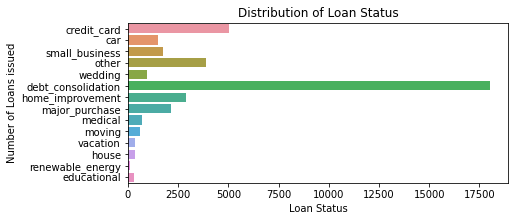

In [42]:
plt.figure(figsize=(15,10))

#plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

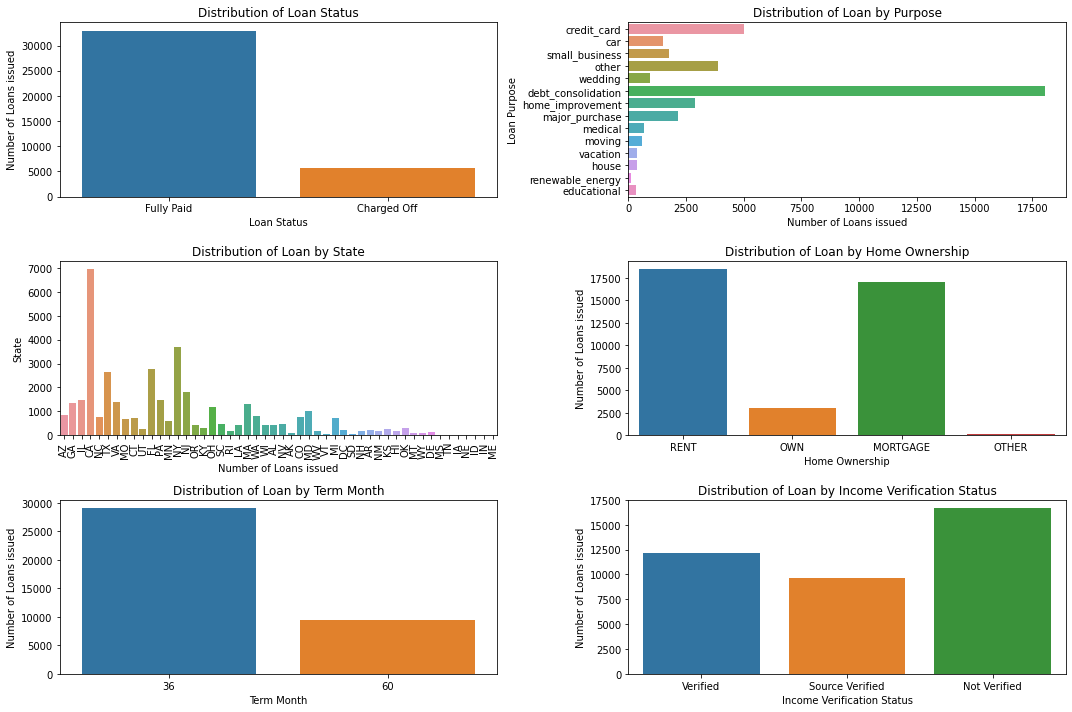

In [55]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(15,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=loan)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=loan)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")
# To rotate axis text
plt.xticks(rotation=90)

# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=loan)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='term_months', data=loan)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=loan)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

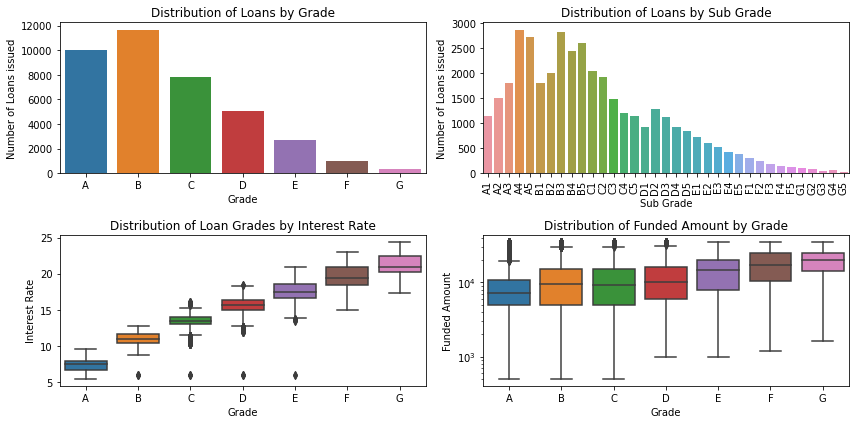

In [58]:
#Univariate Analysis on Ordered Categorical Variables
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=loan,order = np.sort(loan['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=loan, order = np.sort(loan['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt" , data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

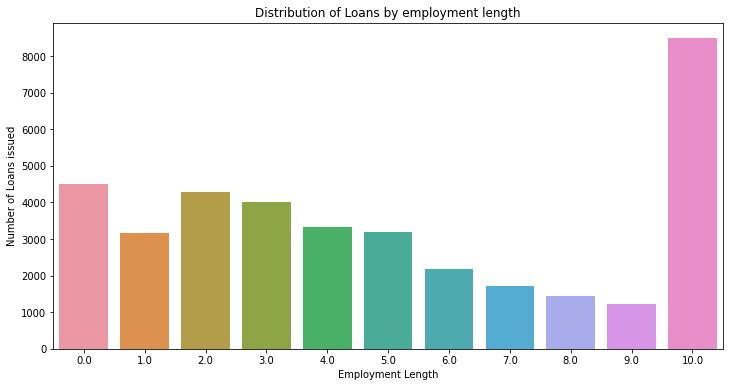

In [59]:
# Distribution of Loans by employment length
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data=loan)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

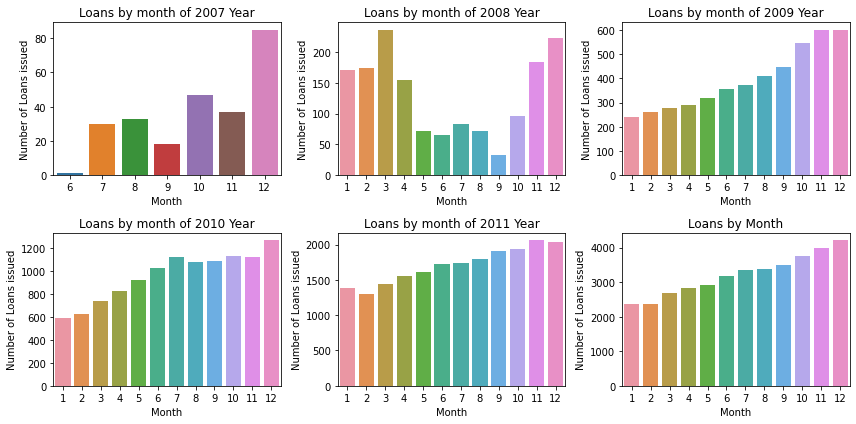

In [60]:
# Number of loans issued (by year/month)
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,3,1)
sns.countplot(x="issued_month", data=loan[loan['issued_year']==2007])
plt.title("Loans by month of 2007 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,2)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2008])
plt.title("Loans by month of 2008 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,3)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2009])
plt.title("Loans by month of 2009 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,4)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2010])
plt.title("Loans by month of 2010 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,5)
sns.countplot( x="issued_month", data=loan[loan['issued_year']==2011])
plt.title("Loans by month of 2011 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,6)
sns.countplot( x="issued_month", data=loan)
plt.title("Loans by Month")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

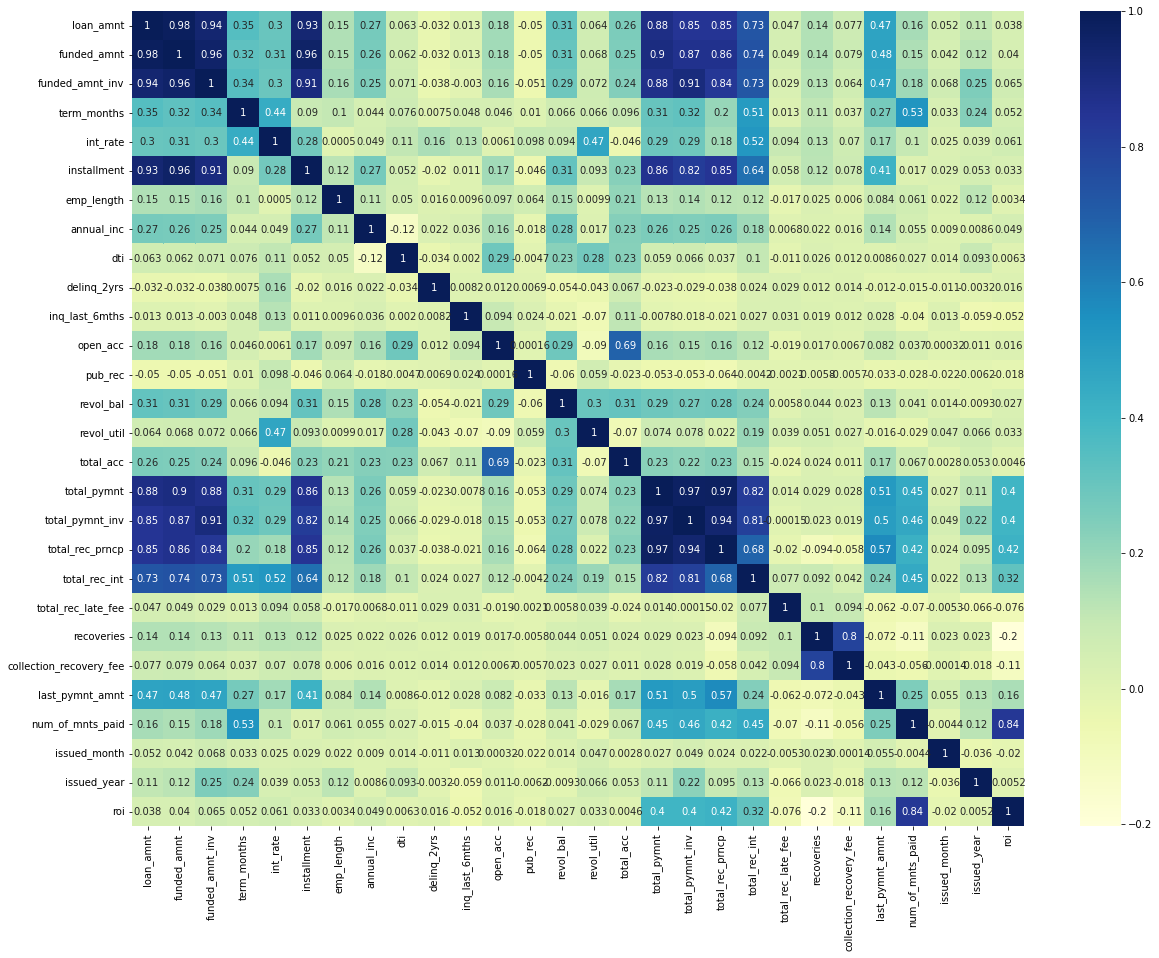

In [61]:
# Bivariate Analysis on Continuous Variables
# Correlation Plot
cor = loan.corr()
round(cor,3)
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

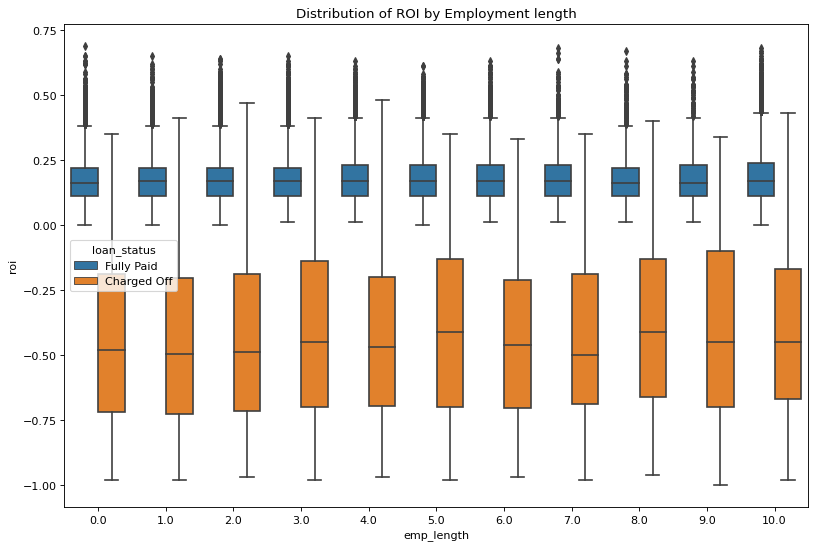

In [62]:
#Bivariate Analysis on Categorical Variables
# ROI vs Employment length by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="emp_length", y='roi', hue='loan_status',  data=loan)
plt.title('Distribution of ROI by Employment length')
plt.show()

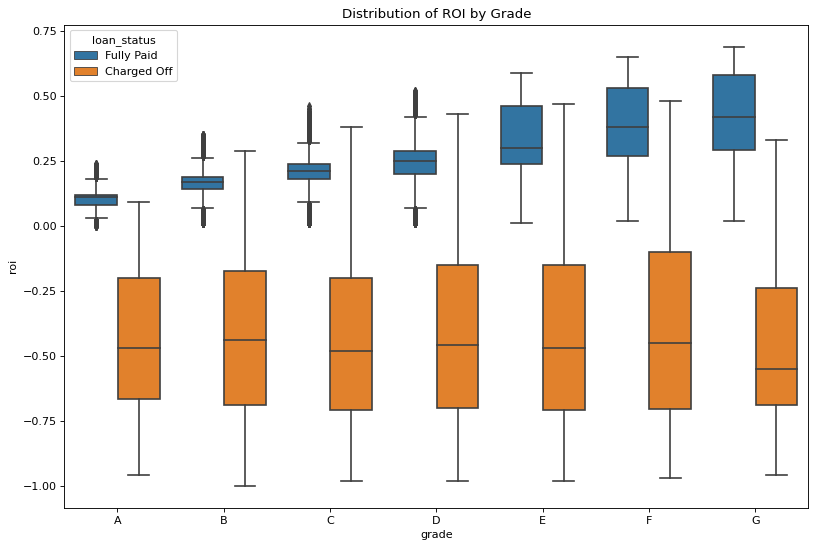

In [63]:
# ROI vs Grade by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="grade", y="roi" ,hue='loan_status', data=loan, order = np.sort(loan['grade'].unique()))
plt.title('Distribution of ROI by Grade')
plt.show()

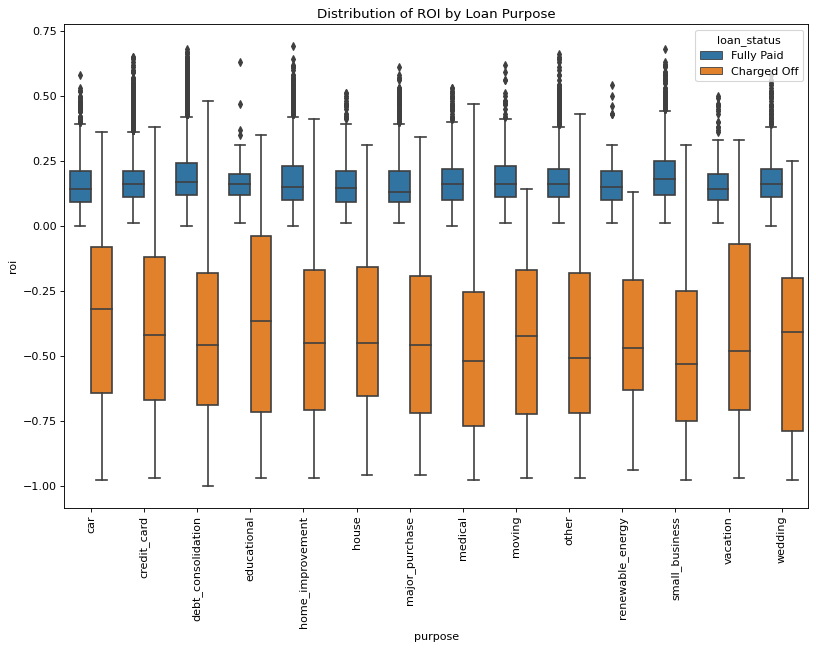

In [64]:
# ROI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='roi', hue='loan_status', data=loan, order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of ROI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

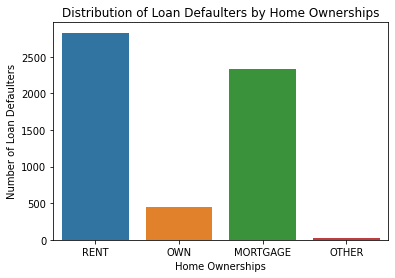

home_ownership
MORTGAGE    2325
OTHER         18
OWN          441
RENT        2827
Name: home_ownership, dtype: int64


In [65]:
#Loan Defaulters Analysis
# Distribution of Loan Defaulters by Home Ownerships
sns.countplot(x='home_ownership',  data=loan[loan['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

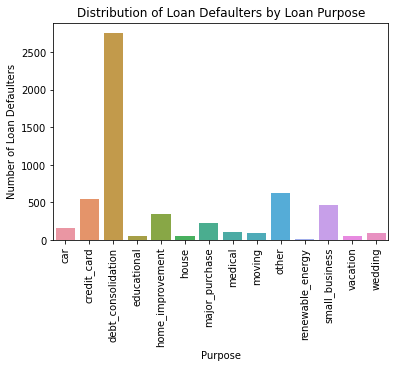

purpose
car                    160
credit_card            542
debt_consolidation    2757
educational             56
home_improvement       345
house                   59
major_purchase         222
medical                106
moving                  92
other                  632
renewable_energy        19
small_business         473
vacation                53
wedding                 95
Name: purpose, dtype: int64


In [66]:
#Distribution of Loan Defaulters by Loan Purpose
sns.countplot(x='purpose',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


print (loan[loan['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())


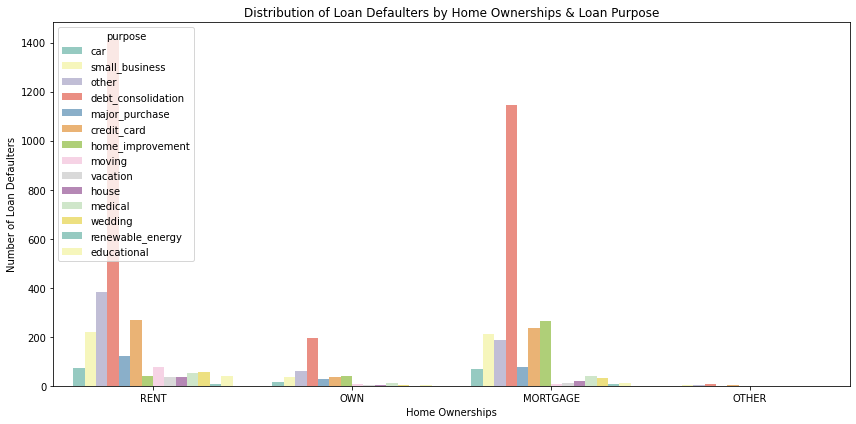

home_ownership  purpose           
MORTGAGE        car                     70
                credit_card            234
                debt_consolidation    1145
                educational             12
                home_improvement       265
                house                   19
                major_purchase          75
                medical                 42
                moving                   8
                other                  187
                renewable_energy         9
                small_business         213
                vacation                13
                wedding                 33
OTHER           car                      1
                credit_card              2
                debt_consolidation       7
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

In [67]:
# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count())

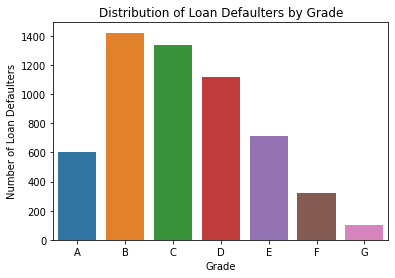

grade
A     602
B    1422
C    1339
D    1116
E     712
F     319
G     101
Name: grade, dtype: int64


In [68]:
#Distribution of Loan Defaulters by Grade
sns.countplot(x='grade',  data=loan[loan['loan_status']=='Charged Off'], order=np.sort(loan['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count())

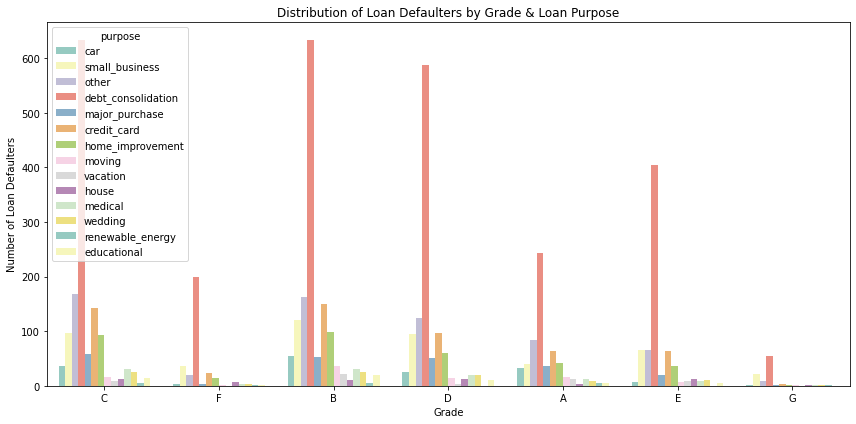

grade  purpose           
A      car                    32
       credit_card            63
       debt_consolidation    243
       educational             5
       home_improvement       41
                            ... 
G      moving                  1
       other                   9
       renewable_energy        2
       small_business         21
       wedding                 2
Name: grade, Length: 93, dtype: int64


In [69]:
# Distribution of Loan Defaulters by Grade & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='purpose', data=loan[loan['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Grade & Loan Purpose')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (loan[loan['loan_status']=='Charged Off'].groupby(['grade','purpose'])['grade'].count())